In [1]:
using CSV, DataFrames, Statistics
using PyPlot # plotting library
using PyCall
using Printf
using FStrings
using LaTeXStrings # for L"$x$" to work instead of needing to do "\$x\$"

# check out all of the styles! https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html
PyPlot.matplotlib.style.use("seaborn-pastel")

# change settings for all plots at once, e.g. font size
rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
rcParams["font.size"] = 16

#make jupyter notebook print more dataframe columns
ENV["COLUMNS"]=160

# important attributes for this analysis
hand = "basic"
subjects = ["sub1", "sub2", "sub3"]
t_labels = ["a", "b", "c", "d", "e", "f", "g", "h"]
rotations = ["n"]
translations = ['a','b','c','d','e','f','g','h']

metrics = [:dist, :arc_len, :area_btwn, :max_a_loc, :max_a_reg, :max_err, :mvt_eff, :t_fd]

metric_to_color = Dict(:dist=>"xkcd:tan", :arc_len=>"xkcd:light blue", :area_btwn=>"xkcd:dark red", :max_a_loc=>"xkcd:light green", :max_a_reg=>"xkcd:dark green", :max_err=>"xkcd:blue grey", :mvt_eff=>"xkcd:dark orange", :r_fd=>"xkcd:red brown", :t_fd=>"xkcd:brown")


print("Ready to go!")

Ready to go!

-----

# Reading in the Data
Now reading in the metrics data for basic.

In [2]:
df_hand = CSV.read(f"results/{hand}_metrics.csv", DataFrame, copycols=true)
first(df_hand, 23)

,trial,arc_len,area_btwn,dist,max_a_loc,max_a_reg,max_err,mvt_eff,r_fd,t_fd
,String,Float64,Float64?,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,sub1_basic_a_n_1,0.0228927,6.57678e-5,0.00505051,0.0,0.0,0.011,0.220616,0.5143,0.0114702
2,sub1_basic_a_n_2,0.0295363,5.77915e-5,0.00505051,0.0,0.0,0.0049,0.170993,0.4406,0.0111463
3,sub1_basic_a_n_3,0.0306213,4.37218e-5,0.00505051,0.0,0.0,0.0037,0.164934,0.6955,0.0135204
4,sub1_basic_a_n_4,0.0137633,4.64978e-5,0.00505051,0.0,0.0,0.0,0.366954,0.2556,0.0132041
5,sub1_basic_a_n_5,0.006,missing,0.010101,0.0,0.0,0.0012,1.6835,0.0,0.00379473
6,sub2_basic_a_n_1,0.0079,2.06537e-5,0.00505051,0.0,0.0,0.0049,0.639304,0.7572,0.00994189
7,sub2_basic_a_n_2,0.0482012,7.97231e-5,0.00505051,0.0,0.0,0.0232,0.10478,1.2241,0.0234776
8,sub2_basic_a_n_3,0.0,0.0,0.00505051,0.0,0.0,0.0,Inf,0.0,0.00505051
9,sub2_basic_a_n_4,0.00306333,missing,0.010101,0.0,0.0,0.0,3.29739,0.0,0.00295466


In [3]:
# breaking out important info from the trial id for easier data access
subject_nums = []
translation_labels = []
numbers = []

for row in eachrow(df_hand)
    x = row[:trial]
    #sub1_basic_a_n_1
    push!(subject_nums, x[4])
    push!(translation_labels, x[12])
    push!(numbers, x[16])
end

s = convert(Array{Char,1}, subject_nums)
d = convert(Array{Char,1}, translation_labels)
n = convert(Array{Char,1}, numbers)

insertcols!(df_hand, 2, :subj=>s)
insertcols!(df_hand, 3, :dir=>d)
insertcols!(df_hand, 4, :num=>n)
first(df_hand, 2)

,trial,subj,dir,num,arc_len,area_btwn,dist,max_a_loc,max_a_reg,max_err,mvt_eff,r_fd,t_fd
,String,Char,Char,Char,Float64,Float64?,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,sub1_basic_a_n_1,1,a,1,0.0228927,6.57678e-5,0.00505051,0.0,0.0,0.011,0.220616,0.5143,0.0114702
2,sub1_basic_a_n_2,1,a,2,0.0295363,5.77915e-5,0.00505051,0.0,0.0,0.0049,0.170993,0.4406,0.0111463


## Asterisk Plot

![Avg Asterisk](./pics/avgd_basic_3subs_n.jpg)

-----

# Histograms of Metrics
Now I will produce histogram plots of the metrics to see what kind of a distribution we get for all the trials.
Shamelessly taken from my previous datascience course at: [link](https://github.com/SimonEnsemble/data_science_course)

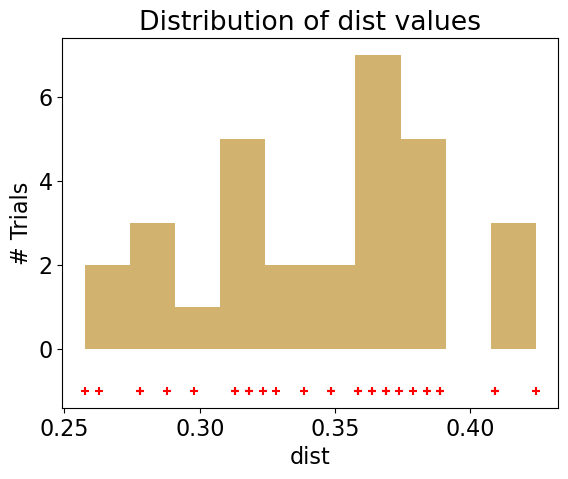

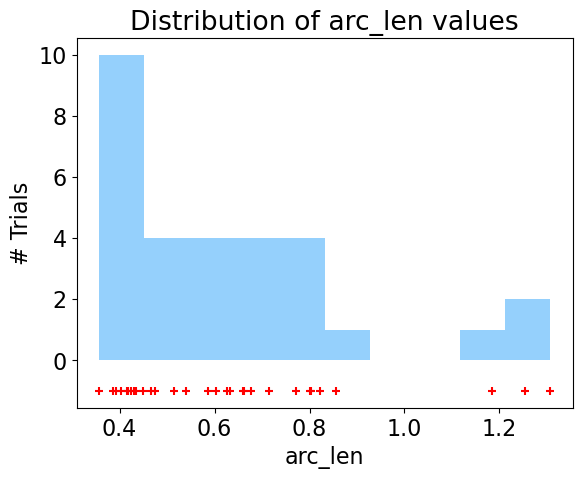

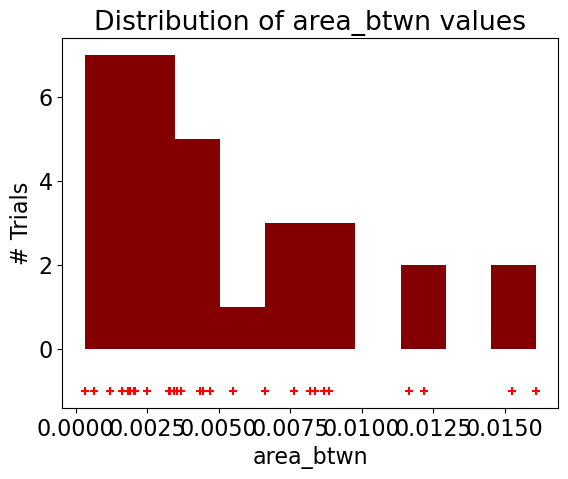

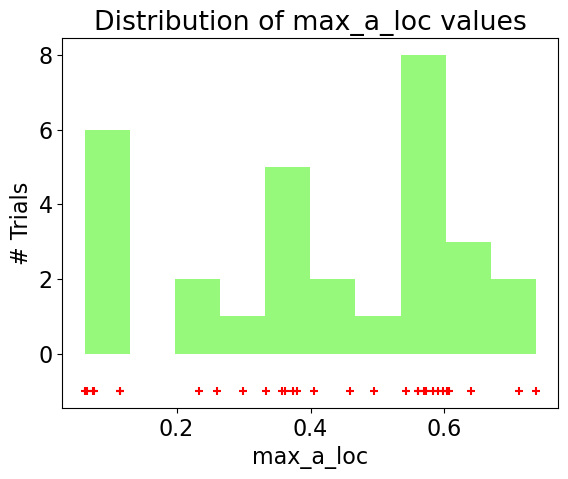

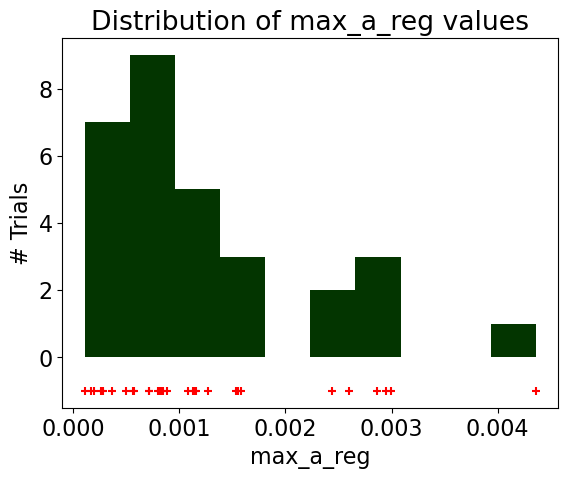

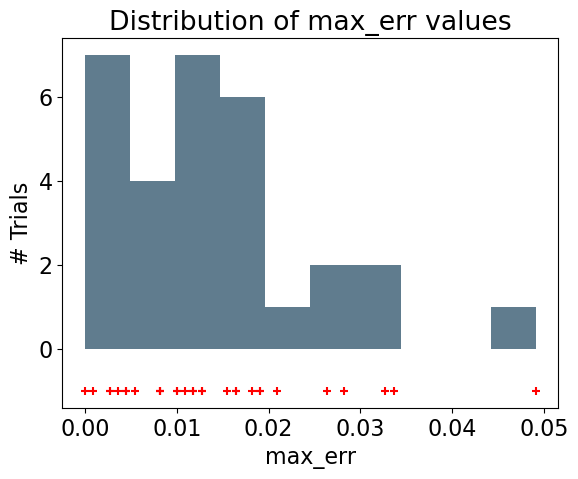

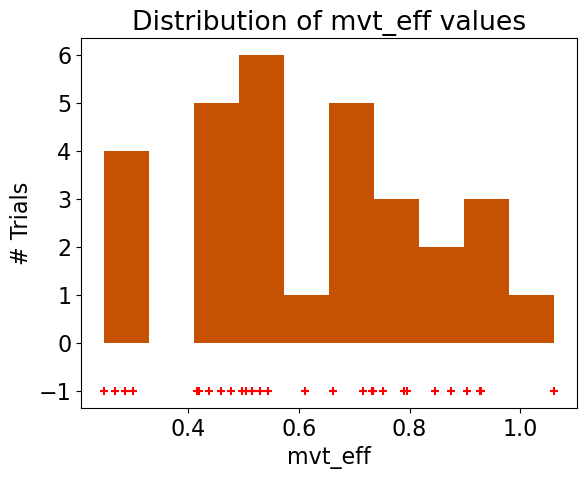

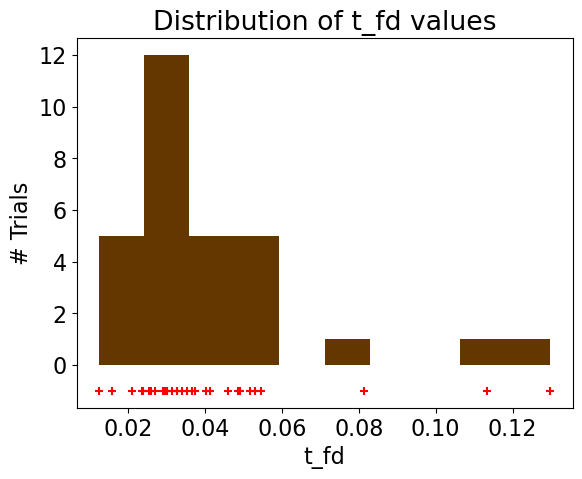

In [25]:
sub_df = filter(row -> row[:dir] in ['c','g'] , df_hand)

for m in metrics
    figure()
    hist(sub_df[:, m], color=metric_to_color[m]) #, normed=true)
    scatter(sub_df[:, m], [-1 for i = 1:nrow(sub_df)], marker="+", color="r")
    xlabel(f"{m}")
    ylabel("# Trials")
    title(f"Distribution of {m} values")
end

### Observations of Histogram Plots
Based on what I see, here are the observations per metric (in order of appearance top to down):
* **total distance**: values are distributed
* **arc length**: mostly concentrated at low arc lengths
* **max area region location**: mostly, the region of max error area is most commonly found at the end
* **max area region**: at the locations of max error area, the area of error (aka the area between the path and the target line) is still relatively low
* **max error**: values are distributed
* **movement efficiency**: values are distributed
* **rotational frechet distance**: aka max rotation error. Mostly low, but larger distribution at the low end
* translational frechet distance: all values are very low

----

# Metric Values by direction
Plot all metric values in bar charts by direction

In [26]:
# groups = groupby(df_hand, :dir)
# a_df = groups[1]
# b_df = groups[2]
# c_df = groups[3]
# d_df = groups[4]
# e_df = groups[5]
# f_df = groups[6]
# g_df = groups[7]
# h_df = groups[8]
# directions = [a_df, b_df, c_df, d_df, e_df, f_df, g_df, h_df]
# a_df
sub_df = filter(row -> row[:dir] in ['c','g'] , df_hand)
first(sub_df, 10)

,trial,subj,dir,num,arc_len,area_btwn,dist,max_a_loc,max_a_reg,max_err,mvt_eff,r_fd,t_fd
,String,Char,Char,Char,Float64,Float64?,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,sub1_basic_c_n_1,1,c,1,0.424375,0.00119729,0.383838,0.299394,0.000260644,0.0027,0.904479,0.7748,0.0459484
2,sub1_basic_c_n_2,1,c,2,0.603375,0.00327456,0.368687,0.560404,0.00081856,0.0118,0.611041,0.7813,0.113278
3,sub1_basic_c_n_3,1,c,3,0.392555,0.00120687,0.363636,0.603636,0.000275827,0.0027,0.926332,0.7748,0.0366209
4,sub1_basic_c_n_4,1,c,4,0.429979,0.00250276,0.363636,0.64,0.000799978,0.0082,0.845708,1.0378,0.0487197
5,sub1_basic_c_n_5,1,c,5,0.402608,0.000321251,0.373737,0.58303,0.000167617,0.0009,0.928291,1.0147,0.129719
6,sub2_basic_c_n_1,2,c,1,1.18536,0.00835194,0.318182,0.260909,0.00155071,0.0182,0.268427,2.2687,0.0313758
7,sub2_basic_c_n_2,2,c,2,0.416829,0.00160558,0.313131,0.0751515,0.000196746,0.0045,0.751223,0.2556,0.0124952
8,sub2_basic_c_n_3,2,c,3,0.855546,0.00663342,0.257576,0.0669697,0.00107746,0.01,0.301066,1.0048,0.0328647
9,sub2_basic_c_n_4,2,c,4,0.714377,0.00353497,0.313131,0.569899,0.000825468,0.0036,0.438328,2.2311,0.0402


In [27]:
function compare_metrics(metric::Symbol, df::DataFrame, ts::Array{Char,1}="nothing") 
    
    if ts == "nothing"
        dir_data = groupby(df, :dir)
    else
        sub_df = filter(row -> row[:dir] in ts, df)
        dir_data = groupby(sub_df, :dir)
    end

    metric_data = []
    
    for dir in dir_data
        data = dir[!, metric]
        push!(metric_data, data)
    end
    
    plt_title = f"{hand}: {metric}"
    boxplot(metric_data)
    title(plt_title)
    x_label = ["c", "g"] # I give up trying to convert char to string
    xticks(1:2, x_label)
    xlabel("Trial Directions")
end

println("Functions are ready!")

Functions are ready!


In [48]:
subjects = ["sub1", "sub2", "sub3"]
translations = ['a','b','c','d','e','f','g','h']
rotations = ["n"]

function get_trial_vals(df::DataFrame, metric::Symbol, translation::Char)
    desired_direction = filter(row -> row[:dir] == translation, df)
    dd = dropmissing(desired_direction, metric)
    names = desired_direction[!, :trial]
    values = dd[!, metric]
    v = convert(Array{Float64,1}, values)
    
    return v, names
end

print("Functions are ready!")

Functions are ready!

-----

# Average Line Calculations

#### Dir: C
![Average Debug Plot for direction C](./pics/avgdebug_2v2_3subs_c_n.jpg)

#### Dir: G
![Average Debug Plot for direction G](./pics/avgdebug_2v2_3subs_g_n.jpg)


----

# T Tests for Symmetry

In [8]:
using HypothesisTests

In [36]:
function compare_2_directions(metric::Symbol, ts="nothings")
    if ts == "nothings"
        ts = ['a','b','c','d','e','f','g','h']
    end
    
    results_report = zeros(2,2)
    
    for t in ts
        i = findall(x->x==t, ts)[1]
        n = 0
        
        for t2 in ts[i:end]
            v1, _ = get_trial_vals(df_hand, metric, t)
            v2, _ = get_trial_vals(df_hand, metric, t2)
            
            result = pvalue(UnequalVarianceTTest(v1, v2))
            r = round(result, digits=4)
            results_report[i, i+n] = r
            
            n = n+1
        end
        println(" ")
    end

    r_df = DataFrame(trials=ts, 
                     c=results_report[1,:], g=results_report[2,:])
    
    return r_df
end

# temp = compare_2_directions(:arc_len)
println("Functions are ready!")

Functions are ready!


In [10]:
# for m in metrics
#     maxes = []
#     mins = []
#     r = compare_2_directions(m)
    
#     println(f"{m} data")
#     println("   ")
#     println(r)
#     println("================================================")
#     println("    ")
# end

----

# Data Analysis 

![Avg Asterisk](./pics/avgd_basic_3subs_n.jpg)

**Hypotheses:**
* df

### Total Distance Travelled


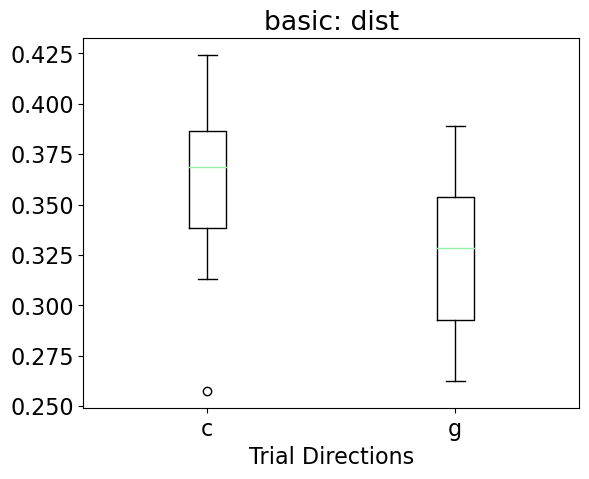

,trials,c,g
,Char,Float64,Float64
1,c,1.0,0.0
2,g,0.0306,1.0


In [49]:
compare_metrics(:dist, df_hand, ['c','g'])
compare_2_directions(:dist, ['c','g'])

### Arc Length

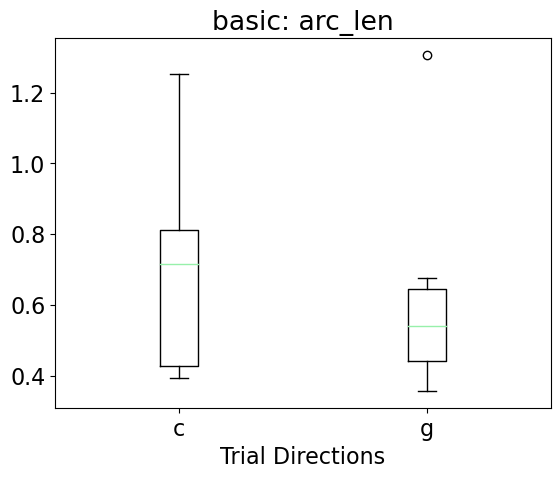

,trials,c,g
,Char,Float64,Float64
1,c,1.0,0.0
2,g,0.2262,1.0


In [50]:
compare_metrics(:arc_len, df_hand, ['c','g'])
compare_2_directions(:arc_len, ['c','g'])

### Movement Efficiency
total_distance / arc_length

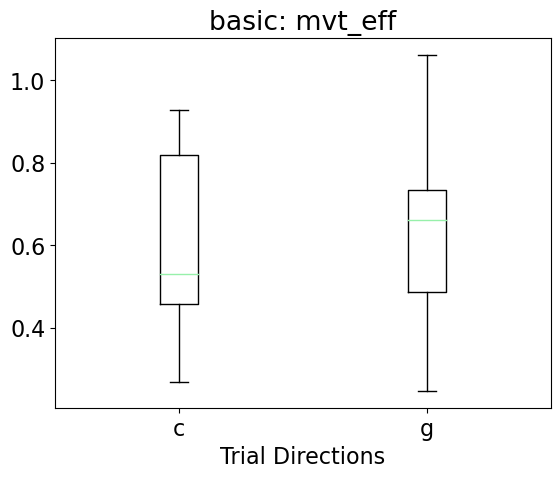

,trials,c,g
,Char,Float64,Float64
1,c,1.0,0.0
2,g,0.7746,1.0


In [51]:
compare_metrics(:mvt_eff, df_hand, ['c','g'])
compare_2_directions(:mvt_eff, ['c','g'])

### Max Error

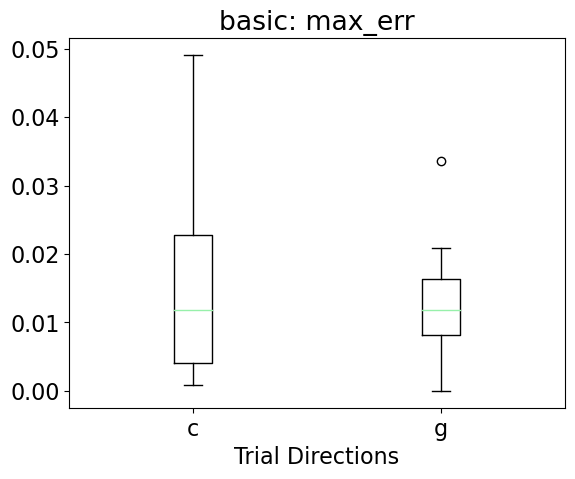

,trials,c,g
,Char,Float64,Float64
1,c,1.0,0.0
2,g,0.5532,1.0


In [52]:
compare_metrics(:max_err, df_hand, ['c','g'])
compare_2_directions(:max_err, ['c','g'])

### Translational Frechet Distance

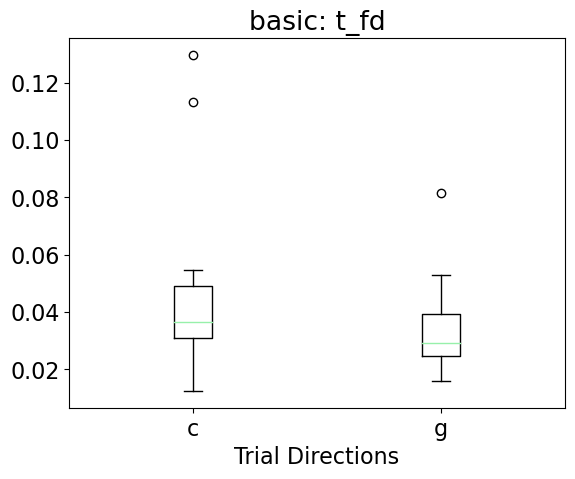

,trials,c,g
,Char,Float64,Float64
1,c,1.0,0.0
2,g,0.1768,1.0


In [53]:
compare_metrics(:t_fd, df_hand, ['c','g'])
compare_2_directions(:t_fd, ['c','g'])

### Total Area Between Curves
Between object path and target line

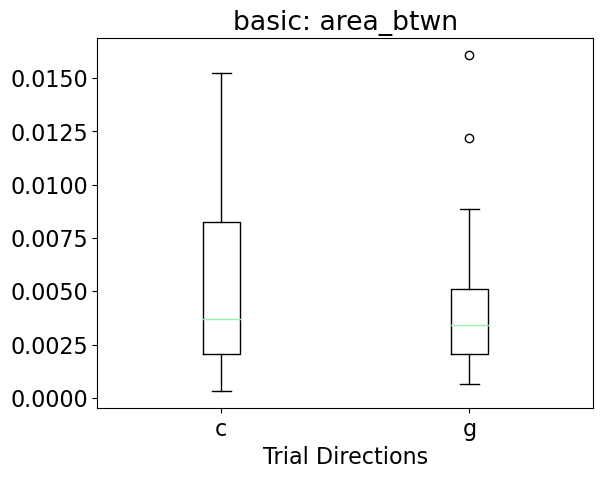

,trials,c,g
,Char,Float64,Float64
1,c,1.0,0.0
2,g,0.7005,1.0


In [54]:
compare_metrics(:area_btwn, df_hand, ['c','g'])
compare_2_directions(:area_btwn, ['c','g'])

### Max Area Region
The area between the curves of a scrolling window of about 20% total_distance width.

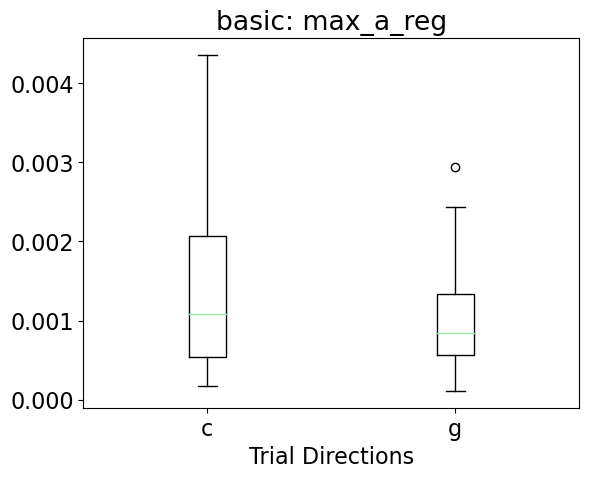

,trials,c,g
,Char,Float64,Float64
1,c,1.0,0.0
2,g,0.3689,1.0


In [55]:
compare_metrics(:max_a_reg, df_hand, ['c','g'])
compare_2_directions(:max_a_reg, ['c','g'])

### Max Area Location
The location of the center of the max area region, represented as a percentage along the full target line (that is, some percentage of 0.5).

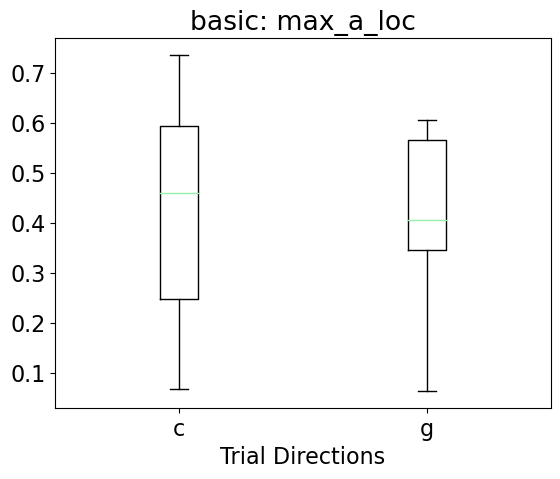

,trials,c,g
,Char,Float64,Float64
1,c,1.0,0.0
2,g,0.8438,1.0


In [56]:
compare_metrics(:max_a_loc, df_hand, ['c','g'])
compare_2_directions(:max_a_loc, ['c','g'])

## Comparing PValues Directly, Direction to Direction, all Metrics

In [59]:
function aggregate_pvalues()
    translations = ['c','g']
    results_report = zeros(2, 2)
    
    for t in translations
        i = findall(x->x==t, translations)[1]
        n = 0
        
        for t2 in translations[i:end]
            total_sigs = 0
            
            for m in metrics
                v1, _ = get_trial_vals(df_hand, m, t)
                v2, _ = get_trial_vals(df_hand, m, t2)

                result = pvalue(UnequalVarianceTTest(v1, v2))
                
                if result <= 0.05
                    total_sigs = total_sigs + 1
                end
                
                if t == t2
                    total_sigs = NaN
                end
            end
            perc_sigs = total_sigs / length(metrics)
            results_report[i, i+n] = perc_sigs
            
            n = n+1
        end
        println(" ")
    end

    r_df = DataFrame(trials=translations = translations, 
                     c=results_report[1,:], g=results_report[2,:])
    
    return r_df
end

aggregate_results = aggregate_pvalues()

,trials,c,g
,Char,Float64,Float64
1,c,NaN,0.0
2,g,0.125,NaN


-----

# Clustering for Symmetry

In [20]:
using Clustering

# use kmeans or hierarchical clustering single linkage?

In [21]:
test = [1, 2, 3, 4, 5]
t = 2
i = findall(x->x!=t, test)

4-element Array{Int64,1}:
 1
 3
 4
 5